<a href="https://colab.research.google.com/github/williamapc/FlowersRecognition1/blob/main/Flowers_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [3]:
# import system libs
import os
import itertools
from PIL import Image # pillow

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print ('modules loaded')

modules loaded


In [4]:
# Generate data paths with labels
train_data_dir = '/kaggle/input/flowers-recognition/flowers'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
train_df

filepaths     labels
0     /kaggle/input/flowers-recognition/flowers/dand...  dandelion
1     /kaggle/input/flowers-recognition/flowers/dand...  dandelion
2     /kaggle/input/flowers-recognition/flowers/dand...  dandelion
3     /kaggle/input/flowers-recognition/flowers/dand...  dandelion
4     /kaggle/input/flowers-recognition/flowers/dand...  dandelion
...                                                 ...        ...
4312  /kaggle/input/flowers-recognition/flowers/rose...       rose
4313  /kaggle/input/flowers-recognition/flowers/rose...       rose
4314  /kaggle/input/flowers-recognition/flowers/rose...       rose
4315  /kaggle/input/flowers-recognition/flowers/rose...       rose
4316  /kaggle/input/flowers-recognition/flowers/rose...       rose

[4317 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
folds

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [7]:
valid_df, train_df = train_test_split(train_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [8]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 2159 validated image filenames belonging to 5 classes.
Found 2158 validated image filenames belonging to 5 classes.


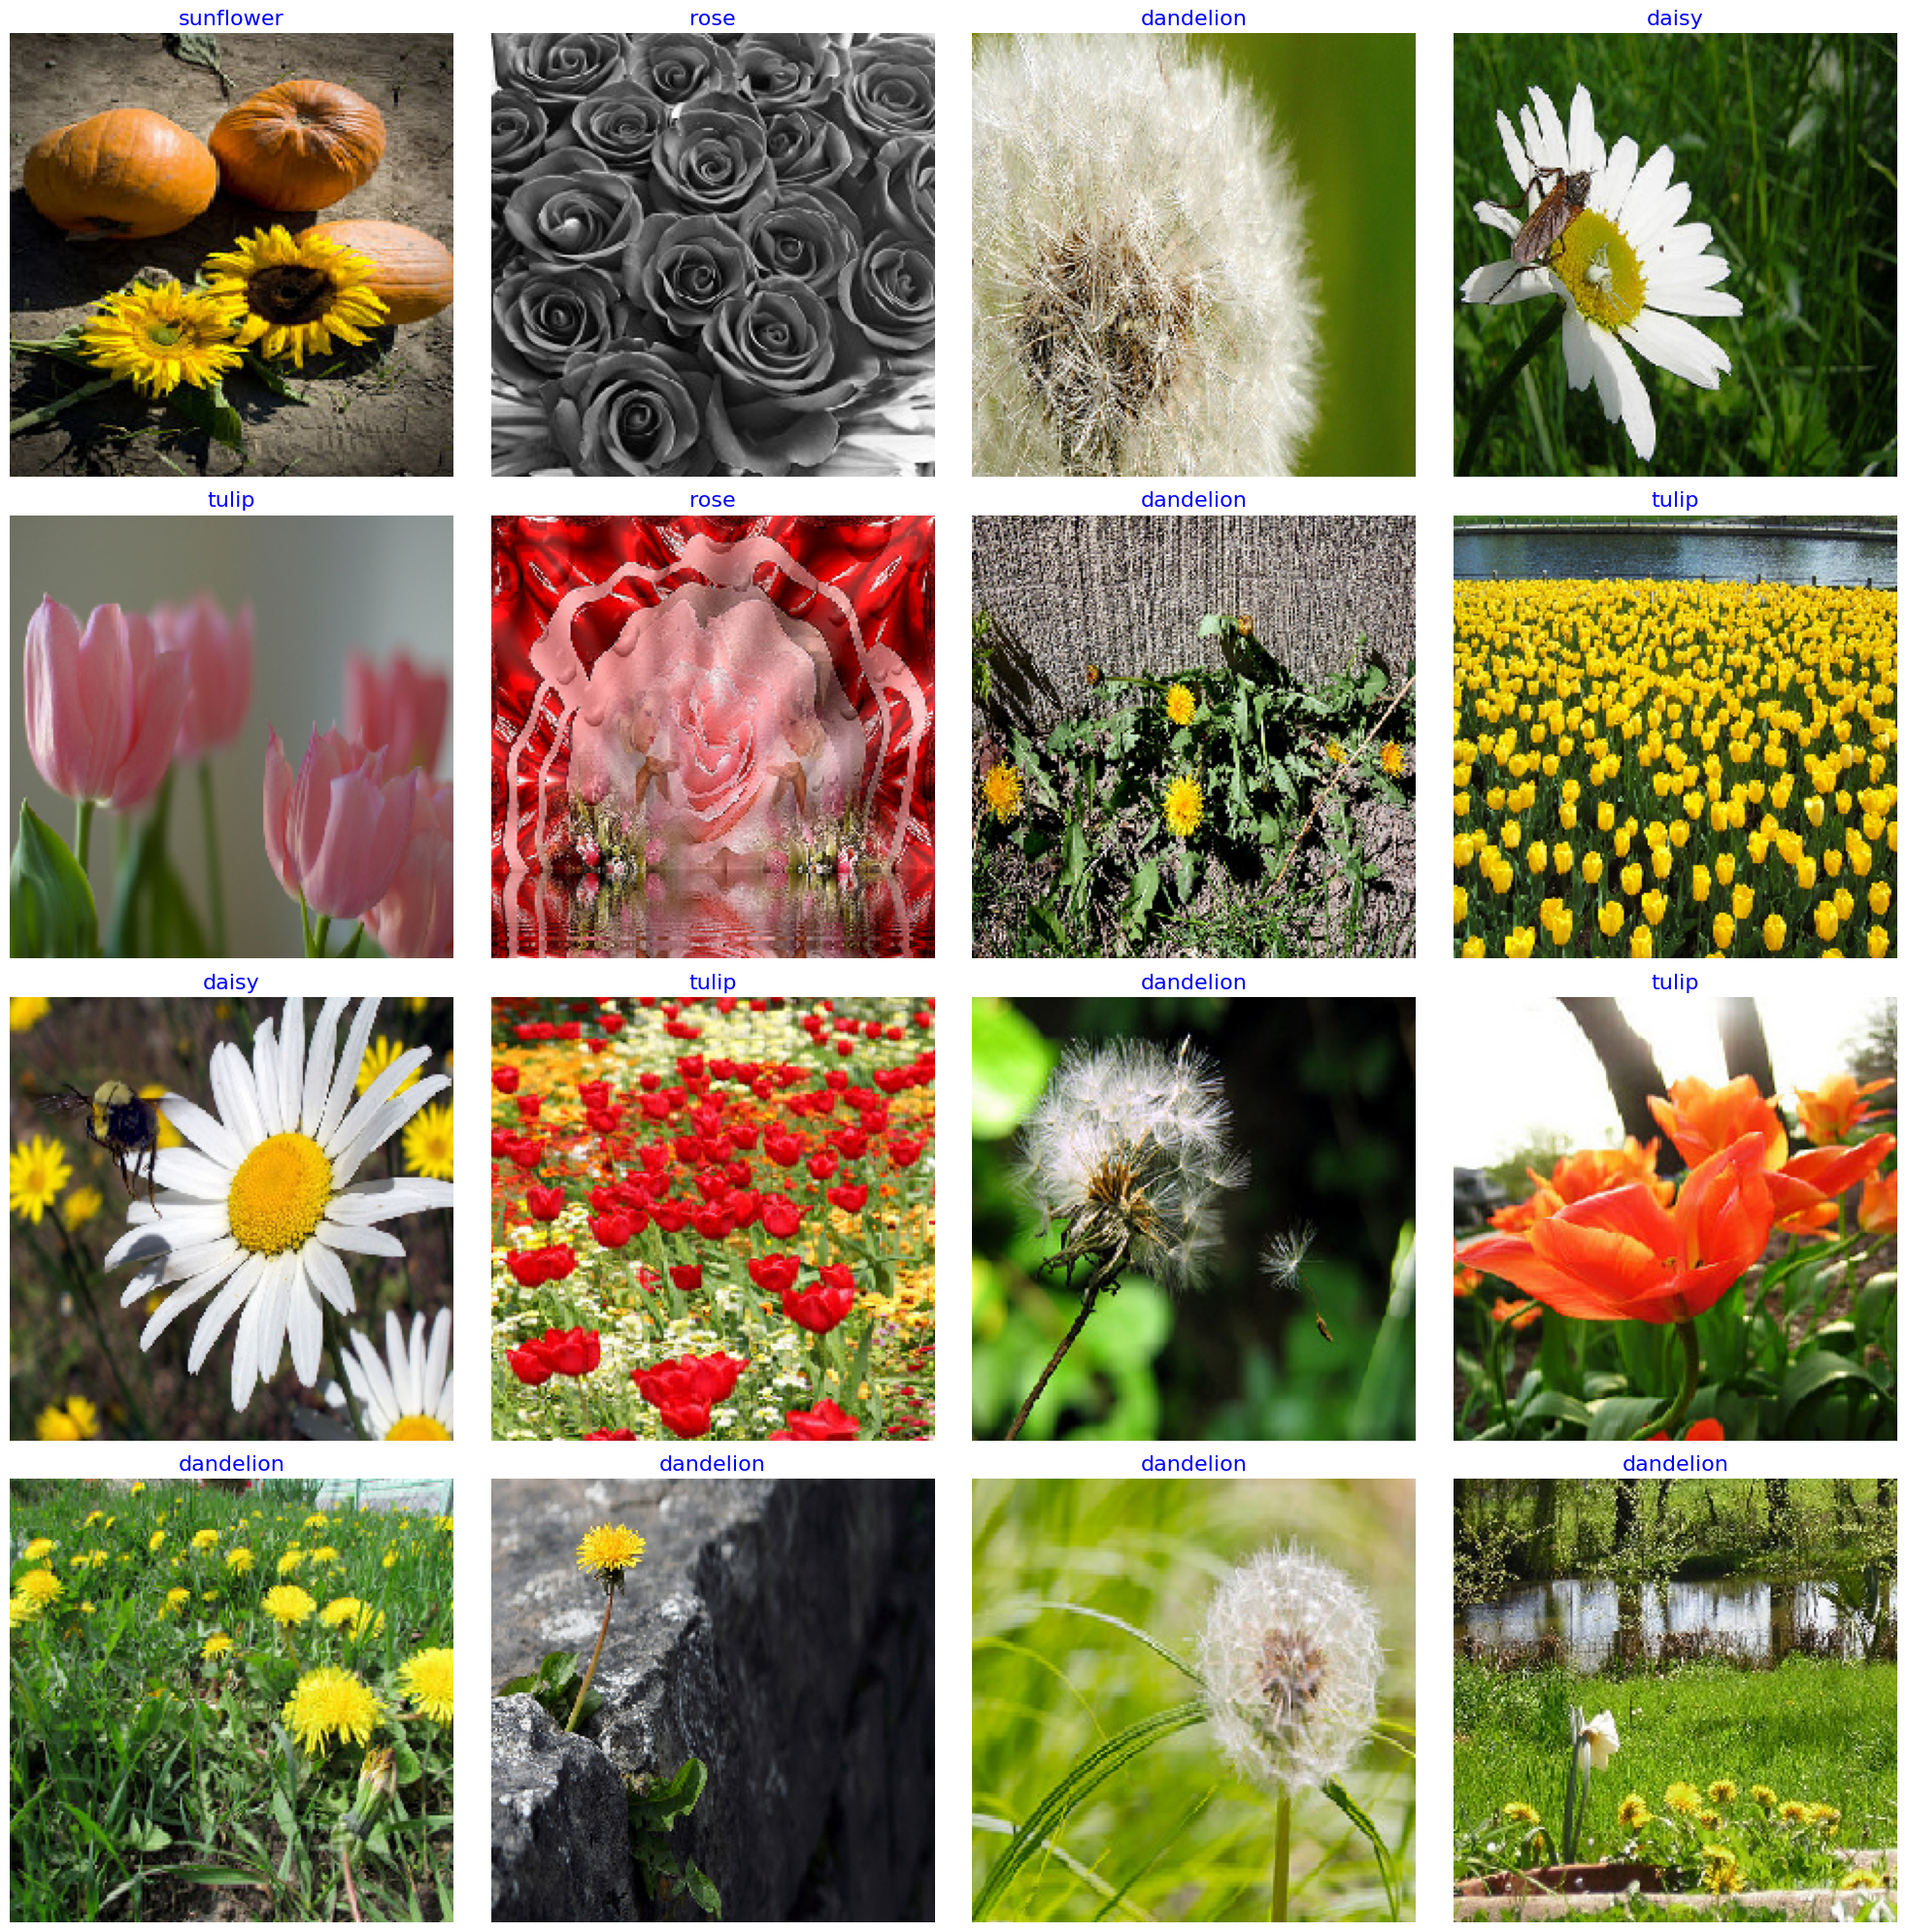

In [9]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,245 (80.70 MB)

 Trainable params: 21,154,245 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# train model


epochs = 20 # number of all epochs in training

history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 113s 637ms/step - accuracy: 0.2580 - loss: 105.0498 - val_accuracy: 0.2850 - val_loss: 1.5410
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.3211 - loss: 1.5264 - val_accuracy: 0.3540 - val_loss: 1.4574
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 353ms/step - accuracy: 0.3044 - loss: 1.4930 - val_accuracy: 0.3563 - val_loss: 1.4145
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 348ms/step - accuracy: 0.3785 - loss: 1.4007 - val_accuracy: 0.4092 - val_loss: 1.3788
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 55s 407ms/step - accuracy: 0.4206 - loss: 1.3535 - val_accuracy: 0.4907 - val_loss: 1.2661
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 352ms/step - accuracy: 0.4852 - loss: 1.2159 - val_accuracy: 0.5343 - val_loss: 1.1389
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.5908 - loss: 1.0388 - val_accuracy: 0.5806 - val_loss: 1.0368
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 351ms/step - accuracy: 0.6644 - loss: 0.8872 - 

In [12]:
# Evaluate the model

train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 0.9449 - loss: 0.1616
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.5748 - loss: 2.5312
Train Loss:  0.17563389241695404
Train Accuracy:  0.94210284948349
--------------------
Validation Loss:  2.4455204010009766
Validation Accuracy:  0.5820204019546509
--------------------


In [13]:
# Get predictions

preds = model.predict(train_gen)  # [0.00001, 95.12312, 0.0021, 3.12313]

y_pred = np.argmax(preds, axis=1)

135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step


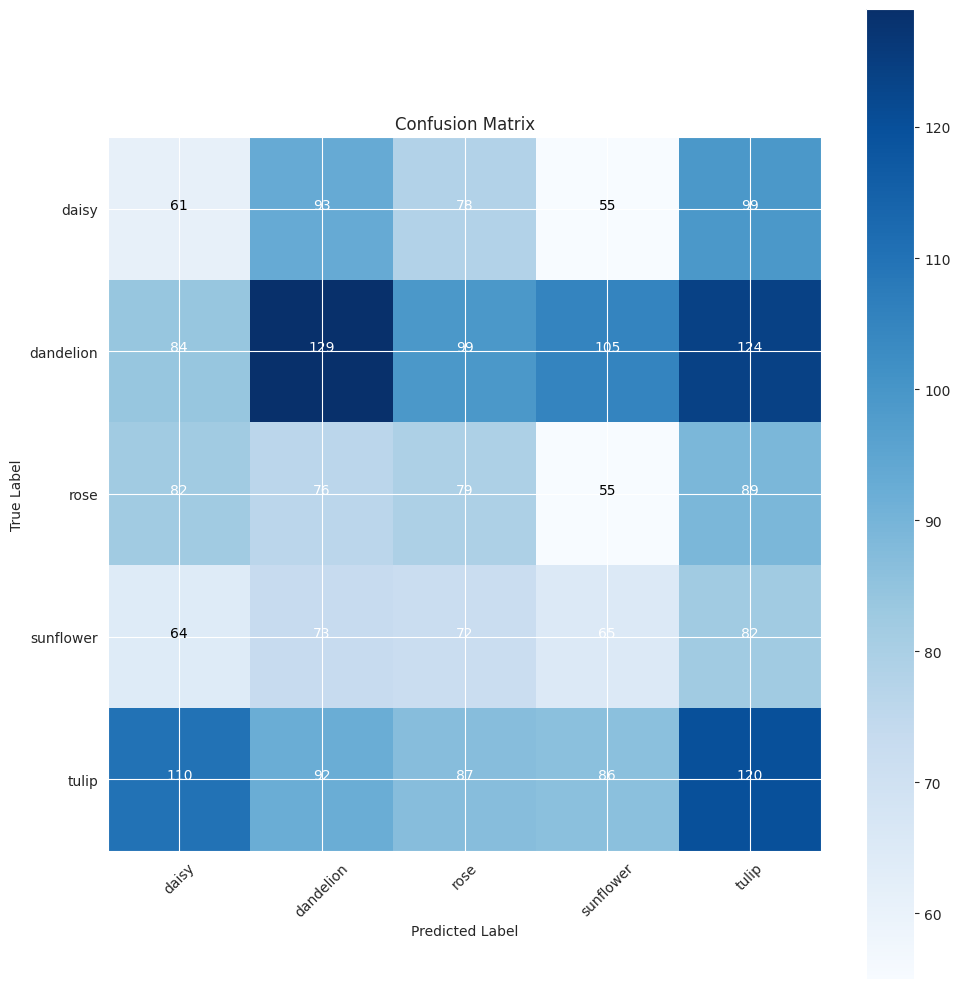

In [14]:
# Confusion Matrics and Classification Report

g_dict = train_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(train_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [15]:
# Classification report
print(classification_report(train_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

       daisy       0.15      0.16      0.16       386
   dandelion       0.28      0.24      0.26       541
        rose       0.19      0.21      0.20       381
   sunflower       0.18      0.18      0.18       356
       tulip       0.23      0.24      0.24       495

    accuracy                           0.21      2159
   macro avg       0.21      0.21      0.21      2159
weighted avg       0.21      0.21      0.21      2159

